In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
company=pd.read_csv("C:\Games\Bhag Milkha Bhag 2013 Hindi MC DVDScr Xvid AC3 IcTv\Desktop\CSV\Company_Data.csv")

In [3]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
company1=pd.get_dummies(company,columns=['Urban','US','ShelveLoc'])

In [7]:
company1["NewSale"]="<=7.490000"
company1.loc[company1["Sales"]>=7.490000,"NewSale"]="HIGH"
company1.loc[company1["Sales"]<=7.490000,"NewSale"]="LOW"


In [8]:
company1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,NewSale
0,9.50,138,73,11,276,120,42,17,0,1,0,1,1,0,0,HIGH
1,11.22,111,48,16,260,83,65,10,0,1,0,1,0,1,0,HIGH
2,10.06,113,35,10,269,80,59,12,0,1,0,1,0,0,1,HIGH
3,7.40,117,100,4,466,97,55,14,0,1,0,1,0,0,1,LOW
4,4.15,141,64,3,340,128,38,13,0,1,1,0,1,0,0,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,1,0,1,0,HIGH
396,6.14,139,23,3,37,120,55,11,1,0,0,1,0,0,1,LOW
397,7.41,162,26,12,368,159,40,18,0,1,0,1,0,0,1,LOW
398,5.94,100,79,7,284,95,50,12,0,1,0,1,1,0,0,LOW


In [9]:
company11=company1.drop('Sales',axis=1)

In [10]:
company11.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,NewSale
0,138,73,11,276,120,42,17,0,1,0,1,1,0,0,HIGH
1,111,48,16,260,83,65,10,0,1,0,1,0,1,0,HIGH
2,113,35,10,269,80,59,12,0,1,0,1,0,0,1,HIGH
3,117,100,4,466,97,55,14,0,1,0,1,0,0,1,LOW
4,141,64,3,340,128,38,13,0,1,1,0,1,0,0,LOW


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
labelencoder = LabelEncoder()

In [13]:
company11.iloc[:,14] = labelencoder.fit_transform(company11.iloc[:,14])

In [14]:
company11

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,NewSale
0,138,73,11,276,120,42,17,0,1,0,1,1,0,0,0
1,111,48,16,260,83,65,10,0,1,0,1,0,1,0,0
2,113,35,10,269,80,59,12,0,1,0,1,0,0,1,0
3,117,100,4,466,97,55,14,0,1,0,1,0,0,1,1
4,141,64,3,340,128,38,13,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,1,0,1,0,0
396,139,23,3,37,120,55,11,1,0,0,1,0,0,1,1
397,162,26,12,368,159,40,18,0,1,0,1,0,0,1,1
398,100,79,7,284,95,50,12,0,1,0,1,1,0,0,1


In [15]:
X = company11.iloc[:,0:14]
Y = company11.iloc[:,14]

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
comp_model = RandomForestClassifier()

In [19]:
comp_model.fit(X_train,Y_train)

RandomForestClassifier()

In [20]:
comp_model.score(X_test,Y_test)

0.7875

In [21]:
y_pred=comp_model.predict(X_test)
np.mean(y_pred==Y_test)

0.7875

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
confusion_matrix(Y_test, y_pred)

array([[28, 14],
       [ 3, 35]], dtype=int64)

In [24]:
acc = accuracy_score(Y_test, y_pred) * 100

In [25]:
acc

78.75

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
comp_model = RandomForestClassifier(n_jobs=4,oob_score=True,n_estimators=50,criterion="entropy")

In [29]:
comp_model.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, n_jobs=4,
                       oob_score=True)

In [30]:
comp_model.score(X_test,Y_test)

0.775

In [31]:
y_pred=comp_model.predict(X_test)
np.mean(y_pred==Y_test)

0.775

In [32]:
acc = accuracy_score(Y_test, y_pred) * 100
acc

77.5

In [33]:
confusion_matrix(Y_test, y_pred)

array([[33,  7],
       [11, 29]], dtype=int64)

In [34]:
import seaborn as sns

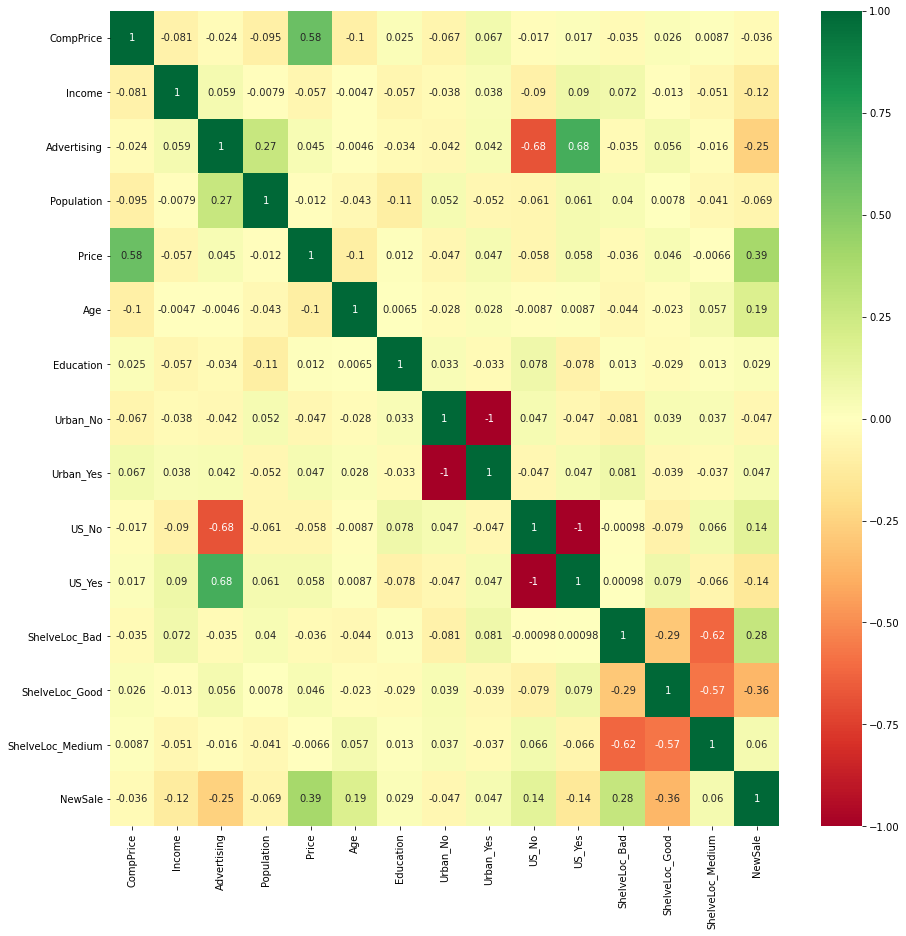

In [35]:
corrmat = company11.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(company11[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#TUNNING THE MODEL BY USING GridSearchCV

In [36]:
n_estimators = [int(x) for x in np.linspace(start=10 , stop=80 , num=10)]
n_jobs = [int(y) for y in np.linspace(start=2 , stop=8 )]
oob_score= [True , False]
criterion=["gini", "entropy"]

In [37]:
param_grid = {'n_estimators' : n_estimators,
            'n_jobs' : n_jobs,
             'oob_score' : oob_score,
             'criterion' : criterion}

In [38]:
comp_model = RandomForestClassifier()

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
rf_Grid = GridSearchCV(estimator = comp_model , param_grid = param_grid , cv=3 )

In [41]:
rf_Grid.fit(X_train,Y_train)

C:\Users\Viresh Vanarote\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Viresh Vanarote\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\Viresh Vanarote\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Viresh Vanarote\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\Viresh Vanarote\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have O

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80],
                         'n_jobs': [2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
                                    3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, ...],
                         'oob_score': [True, False]})

In [42]:
rf_Grid.best_params_

{'criterion': 'entropy', 'n_estimators': 48, 'n_jobs': 3, 'oob_score': False}

In [43]:
print(f'trainAcc - : {rf_Grid.score(X_train,Y_train):.3f}')
print(f'testAcc - : {rf_Grid.score(X_test,Y_test):.3f}')

trainAcc - : 0.997
testAcc - : 0.787
